In [18]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio
# with h5py.File('spike_train.mat', 'r') as f:
#     ref_spike_train = f['spike_train'][()]



In [ ]:
spike_data = scio.loadmat('D:\mbl_mouse_2025\BenIgnitius\preprocessed\B4-2025-07-07\clean_units_imec0.mat')


In [23]:
spike_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'depths', 'unit_ids', 'channel_ids', 'spike_train', 'shank_ids', 'mean_waveforms', 'peak_amp', 'valley_amp'])

In [42]:
spike_trains = [x[0].squeeze() for x in spike_data['spike_train']]

In [46]:
%matplotlib widget

In [53]:
# Code to load stim_times
stim_times = np.loadtxt('D:\mbl_mouse_2025\BenIgnitius\preprocessed\B4-2025-07-07\XA1_ON.txt', dtype='float')
con_indices = [1,3,5,7,9,11,13,15,17,19]
pos_indices = [0,6,8,12,16]
neg_indices = [2,4,10,14,18]

In [54]:
# Code to plot trialized rasters for control condition
pre = 2
post = 10
this_spike_train = spike_trains[0]
control_spike_train = []
for idx in con_indices:
    this_stim = stim_times[idx]
    keep = (this_spike_train>this_stim-pre) & (this_spike_train<this_stim+post)
    this_control_spike_train = this_spike_train[keep]
    control_spike_train.append(this_control_spike_train)

In [ ]:
control_spike_train2 = np.hstack(control_spike_train)

array([  92.917     ,   92.94856667,   92.96286667, ..., 1184.43993333,
       1184.4426    , 1184.4798    ])

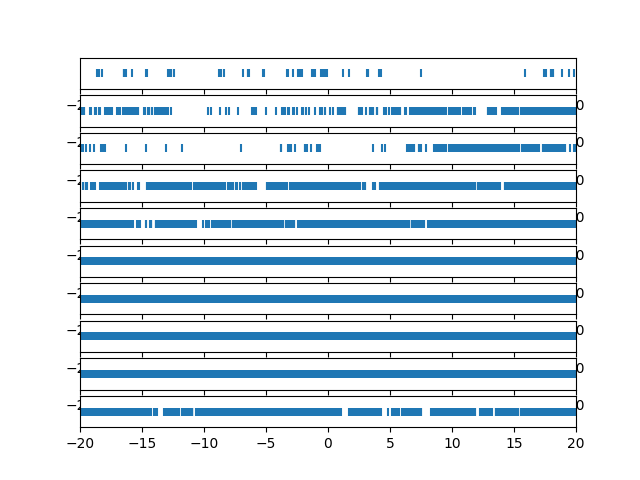

In [78]:
pre, post = 20, 20

spike_train = spike_trains[0]
con_aligned_spike_trains = []
for idx in con_indices:
    this_stim = stim_times[idx]
    keep = (spike_train>this_stim-pre) & (spike_train<this_stim+post)
    this_con_spike_train = spike_train[keep]
    this_con_spike_train -= this_stim
    con_aligned_spike_trains.append(this_con_spike_train)

fig, ax = plt.subplots(10,1)

for i,st in enumerate(con_aligned_spike_trains):
    ax[i].scatter(st, np.ones_like(st), marker='|')
    # ax[i].title(f'Control stim #{i+1}')
    ax[i].set_xlim(-20,20)
    ax[i].set_yticks([])
plt.show()
# for spike_train in spike_trains:
#     plt.scatter(spike_train, np.ones_like(spike_train), marker = '|')
#     plt.scatter(control_spike_train2, np.zeros_like(control_spike_train2), marker = '|')
#     break
# for idx in con_indices:
#     plt.axvline(stim_times[idx], ymin=-1, ymax=2)
# plt.show()

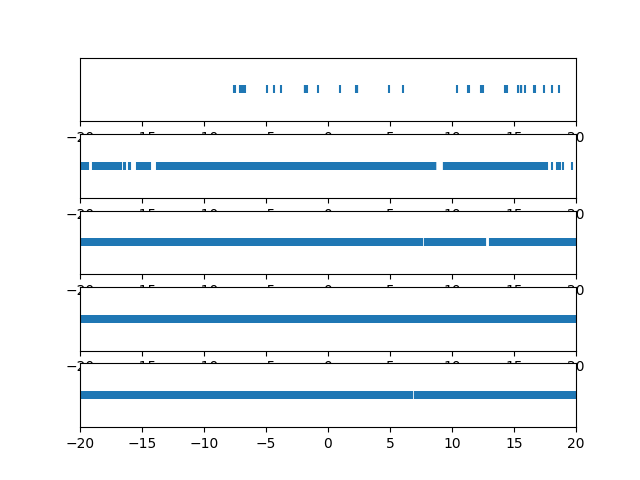

In [ ]:
pre, post = 10, 50

spike_train = spike_trains[0]
pos_aligned_spike_trains = []
for idx in pos_indices:
    this_stim = stim_times[idx]
    keep = (spike_train>this_stim-pre) & (spike_train<this_stim+post)
    this_pos_spike_train = spike_train[keep]
    this_pos_spike_train -= this_stim
    pos_aligned_spike_trains.append(this_pos_spike_train)

neg_aligned_spike_trains = []
for idx in neg_indices:
    this_stim = stim_times[idx]
    keep = (spike_train>this_stim-pre) & (spike_train<this_stim+post)
    this_neg_spike_train = spike_train[keep]
    this_neg_spike_train -= this_stim
    neg_aligned_spike_trains.append(this_neg_spike_train)

con_aligned_spike_trains = []
for idx in con_indices:
    this_stim = stim_times[idx]
    keep = (spike_train>this_stim-pre) & (spike_train<this_stim+post)
    this_con_spike_train = spike_train[keep]
    this_con_spike_train -= this_stim
    con_aligned_spike_trains.append(this_con_spike_train)




fig, ax = plt.subplots(5,1)

for i,st in enumerate(pos_aligned_spike_trains):
    ax[i].scatter(st, np.ones_like(st), marker='|')
    # ax[i].title(f'Control stim #{i+1}')
    ax[i].set_xlim(-20,20)
    ax[i].set_yticks([])
plt.show()
# for spike_train in spike_trains:
#     plt.scatter(spike_train, np.ones_like(spike_train), marker = '|')
#     plt.scatter(control_spike_train2, np.zeros_like(control_spike_train2), marker = '|')
#     break
# for idx in con_indices:
#     plt.axvline(stim_times[idx], ymin=-1, ymax=2)
# plt.show()

In [72]:
con_aligned_spike_trains

[array([-18.61499167, -18.483325  , -18.23409167, -16.46719167,
        -16.44875833, -16.42505833, -16.32455833, -15.79325833,
        -14.70449167, -14.602725  , -12.941825  , -12.77089167,
        -12.730325  , -12.71059167, -12.68989167, -12.65379167,
        -12.382725  ,  -8.77109167,  -8.61539167,  -8.39485833,
         -6.81919167,  -6.46639167,  -6.421125  ,  -6.34689167,
         -5.27139167,  -5.12295833,  -3.289025  ,  -3.203325  ,
         -2.79255833,  -2.41595833,  -2.28495833,  -2.06325833,
         -1.269325  ,  -1.23775833,  -1.22345833,  -1.08175833,
         -0.57149167,  -0.41319167,  -0.23779167,  -0.13139167,
         -0.11355833,   1.23214167,   1.65534167,   3.148975  ,
          3.21394167,   3.248175  ,   4.08754167,   4.28704167,
          7.48664167,  15.917075  ,  17.42630833,  17.60674167,
         17.95494167,  17.98840833,  18.045775  ,  18.10864167,
         18.164175  ,  18.89204167,  19.44900833,  19.82140833]),
 array([-19.992499  , -19.83596567, -1

In [ ]:
fig = plt.figure()
ax = plt.subplot(10,1,1)
for spike_train in spike_trains:
    
    plt.scatter(spike_train, np.ones_like(spike_train), marker = '|')
    plt.scatter(control_spike_train2, np.zeros_like(control_spike_train2), marker = '|')
    break
for idx in con_indices:
    plt.axvline(stim_times[idx], ymin=-1, ymax=2)
plt.show()